## TOKENIZATION
This involves the breaking of text into smaller units (tokens) for easy analysis. The most common type of tokens are words, but depending on the usecase, they can be sentences, sub-words or even single characters.

In [ ]:
# Import nltk and download 'punkt_tab'. It is used to figure out where sentences begin and end

from nltk.tokenize import word_tokenize, sent_tokenize
sentence = "Her cat's name is Luna. Her dog's name is Saul"
try:
    sentences = sent_tokenize(sentence)
except LookupError:
    import nltk
    nltk.download("punkt_tab")
    sentences = sent_tokenize(sentence)

print(sentences)
print(word_tokenize("her cat's name is luna "))
print(word_tokenize(sentence))
print(word_tokenize("her cat's name is luna and her dog's name is max"))

# [nltk_data] Downloading package punkt_tab to /root/nltk_data...
# ["Her cat's name is Luna.", "Her dog's name is Saul"]
# [nltk_data]   Unzipping tokenizers/punkt_tab.zip.


## STEMMING & LEMMATIZATION
Stemming is a process of standardizing text. In this process, words are reduced to their base form i.e., `Connected` -> `Connect`, `Connecting` -> `Connect`. It works by chopping off endings or suffixes from words but it's not always accurate as `Studies` can be reduced to `Stud` instead of `Study`. It's essential as it reduces complexity in the dataset and makes it easier to manage.

While stemming chops off the end of a word, lemmatization is more sophisticated, as it uses a predefined dictionary to find the correct base. This way it knows the context of the word and uses that information to reduce it properly. It uses vocabulary and grammer rules to return valid base forms, while stemming often produces crude roots.

To use lemmatization, we need to download a lexical database called WordNet.


In [ ]:
from nltk.stem import PorterStemmer, WordNetLemmatizer


stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

connect_tokens = ["connecting", "connected", "connection", "connections", "connectivity", "connect", "connects"]
for token in connect_tokens:
    print(token, ":->", stemmer.stem(token))
    print(token, " ::: ", lemmatizer.lemmatize(token))

learn_token = ["learning", "learn", "learned", "learns", "learn's", "learners", "learner"]
print("\n")
for token in learn_token:
    print(token, ":->", stemmer.stem(token))
    try:
        print(token, ":::", lemmatizer.lemmatize(token))
    except LookupError:
        import nltk
        nltk.download("wordnet")
        print(token, ":::", lemmatizer.lemmatize(token))

# Let's see a stem mistake
print("\n")
tokens = ["likes", "better", "worse"]
for token in tokens:
  print(token, ":->", stemmer.stem(token))
  print(token, ":::", lemmatizer.lemmatize(token))

## N-GRAMS & PANDAS
N-grams are another concept in text processing, and it helps us analyze not just individual words, but also the relationship between the neighboring words. The value of `n` tells us how many words are grouped and when `n` is one, we have single words called `unigrams`. For 2, we have `bigrams` and for 3, we have `trigrams`.

E.g.,
`Sentence` = I love NLP
`unigrams` = I, Love, NLP
`bigrams` = I Love, Love NLP
`trigrams` = I love NLP

When working with n-grams, we can recognize the difference in words like `New York`, and `Credit Card` as they both carry separate meanings when together and alone.

Pandas is one of the most important libraries in Python for data analysis. It helps in storing, cleaning, analyzing and exploring data quickly and efficiently. You can use Pandas to
- load data from CSV, Excel or SQL database files
- filter rows
- select specific columns
- perform calculations (like averages or totals)
- combine multiple datasets together
- handle missing values.

In Pandas, a Series is a one-dimensional labelled array, like a single column in a spreadsheet.
`pd.Series([1, 2, 3, 4])`
A Dataframe is a two-dimensional table, like a full spreadsheet with rows and columns.

<Axes: >

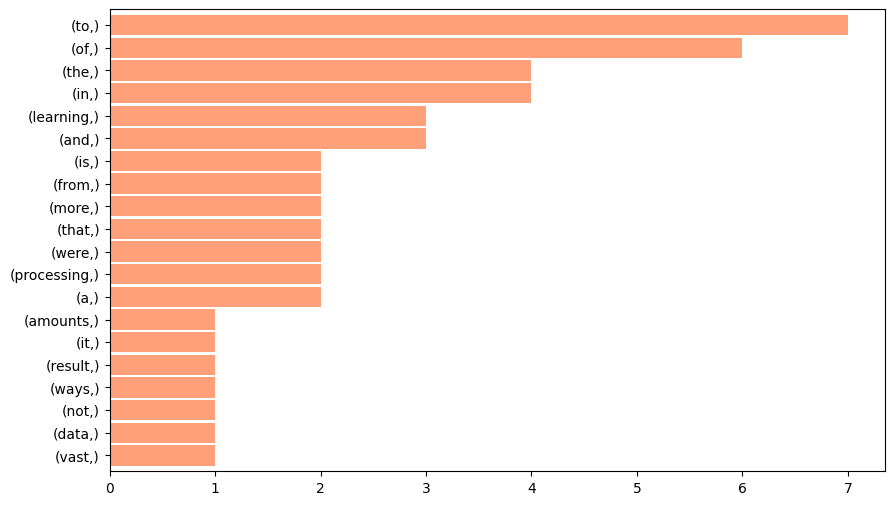

In [73]:
import nltk
import pandas as pd
import faker
import matplotlib.pyplot as plt

fake = faker.Faker()

tokens = [
    'the', 'rise', 'of', 'artificial', 'intelligence', 'has', 'led', 'to', 'significant', 'advancements', 'in', 'natural', 'language', 'processing', 'computer', 'vision', 'and', 'other', 'fields', 'machine', 'learning',
    'algorithms', 'are', 'becoming', 'more', 'sophisticated', 'enabling', 'computers', 'to', 'perform', 'complex', 'tasks', 'that', 'were', 'once', 'thought', 'to', 'be', 'the', 'exclusive', 'domain', 'of', 'humans',
    'with', 'the', 'advent', 'of', 'deep', 'learning', 'neural', 'networks', 'have', 'become', 'even', 'more', 'powerful', 'capable', 'of', 'processing', 'vast', 'amounts', 'of', 'data', 'and', 'learning',
    'from', 'it', 'in', 'ways', 'that', 'were', 'not', 'possible', 'before', 'as', 'a', 'result', 'ai', 'is', 'increasingly', 'being', 'used', 'in', 'a', 'wide', 'range', 'of', 'industries', 'from', 'healthcare', 'to',
    'finance', 'to', 'transportation', 'and', 'its', 'impact', 'is', 'only', 'set', 'to', 'grow', 'in', 'the', 'years', 'to', 'come'
]

# tokens = fake.sentence(100).split(" ")
unigrams = (pd.Series(nltk.ngrams(tokens, 1)).value_counts())
unigrams
# unigrams.sort_values().plot(color="lightsalmon", figsize=(12,8))
unigrams[:20].sort_values().plot.barh(color="lightsalmon", width=.9, figsize=(10,6))

In [74]:
bigrams = pd.Series(nltk.ngrams(tokens, 2)).value_counts()
bigrams
# Trigrams would be 3 and they would all be 1.

(that, were)             2
(the, rise)              1
(increasingly, being)    1
(ai, is)                 1
(result, ai)             1
                        ..
(tasks, that)            1
(complex, tasks)         1
(perform, complex)       1
(to, perform)            1
(to, come)               1
Name: count, Length: 105, dtype: int64

In [2]:
import re

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords
import pandas as pd

data = pd.read_csv("Files/tripadvisor_hotel_reviews.csv")
data.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
# Let's make it lowercase - Reviews
data["Review"] = data["Review"].str.lower()
# Let's remove stop words (- not)
en_stop_words = set(stopwords.words("english"))
en_stop_words.remove("not")
data["ReviewNoStopWords"] = data["Review"].apply(lambda x: " ".join(word for word in x.split() if word not in (en_stop_words)))
# removed = set(data.Review[0].split(" ")).difference(set(data.ReviewNoStopWords[0].split(" ")))
data.head()

,Review,Rating,ReviewNoStopWords
0,nice hotel expensive parking got good deal sta...,4,nice hotel expensive parking got good deal sta...
1,ok nothing special charge diamond member hilto...,2,ok nothing special charge diamond member hilto...
2,nice rooms not 4* experience hotel monaco seat...,3,nice rooms not 4* experience hotel monaco seat...
3,"unique, great stay, wonderful time hotel monac...",5,"unique, great stay, wonderful time hotel monac..."
4,"great stay great stay, went seahawk game aweso...",5,"great stay great stay, went seahawk game aweso..."


In [17]:
'having' in en_stop_words

True